## **FAKE NEWS DETECTION**

## **!!! Important !!!**

**The Data preprocessing (creation of stemmed and lemmatized dataset) part is too time consuming. Creation of stemmed dataset takes around *45 mins* and creation of lemmatized dataset takes around *60 mins*. So, if you're in hurry we've got a shortcut for you. We've already uploaded the preprocessed dataset on google drive and made it public. The commands are already written to fetch the preprocessed data from there.**

**So, to save time you can skip the cells under Data Preprocessing and execute other cells.**

**Dataset Reference**<br/>
Link: [Fake News](https://www.kaggle.com/c/fake-news/data)

**Supress the Warnings**
<br/>
Just to avoid red outputs aka warnings and not to spoil the looks (>_<)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Installing Kaggle API and downloading the dataset
Reference: [Downloading the dataset using Kaggle API](https://www.kaggle.com/general/74235)

**Install Kaggle API**

In [ ]:
! pip install kaggle

**Make directory named *.kaggle* in *root*** 

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


**Copying the API Token *kaggle.json* to */root/.kaggle* directory which was downloaded after registering on kaggle**

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


**Change the permissions on *kaggle.json* file**

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

**Download the dataset**<br/>
Three files namely *test.csv.zip*, *submit.csv*, *train.csv.zip* are downloaded. We will use only *train.csv.zip* for our work. 

In [ ]:
! kaggle competitions download -c fake-news

  0% 0.00/40.6k [00:00<?, ?B/s]
100% 40.6k/40.6k [00:00<00:00, 35.9MB/s]
 73% 27.0M/37.0M [00:00<00:00, 124MB/s]
100% 37.0M/37.0M [00:00<00:00, 147MB/s]
  0% 0.00/9.42M [00:00<?, ?B/s]
100% 9.42M/9.42M [00:00<00:00, 86.7MB/s]


## **The show starts here**

Since everytime new API tiken is required to be generated from kaggle, We have uploaded the dataset on google drive from where it can be pulled using *gdown*.

In [ ]:
! gdown --id 192ic-BuNrbgvDhQXoT7mxUdilqfJvnDC

Downloading...
From: https://drive.google.com/uc?id=192ic-BuNrbgvDhQXoT7mxUdilqfJvnDC
To: /content/train.csv.zip
100% 38.8M/38.8M [00:00<00:00, 147MB/s]


**Extract *train.csv* file from *train.csv.zip***

In [ ]:
! unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


**Read the Dataset**<br/>
The *read_csv* function of PANDAS library is used to read the extracted *train.csv* file. The Contents of the dataset are visualiszed after this.

In [ ]:
import pandas as pd

data_train = pd.read_csv('train.csv')
data_train 

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


**Drop the Irrelevant Columns**<br/>
Since we require only text for our task we drop the *id*, *title* and *author* attributes from the dataframe. After this those rows are removed using *dropna()* which don't have any *text*.

In [ ]:
messages = data_train.drop(columns=['id','author','title'])
messages = messages.dropna()

After dropping the irrelevant columns and rows having NULL values, datframe is visualized here. We can see that here we have only 20761 rows whereas original dataset had 20800 rows. This implies that 39 rows had empty text field. 

In [ ]:
messages

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


Downloading the necessary NLTK packages

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Data Visualisation
Reference: [Code Reference 1](https://medium.com/analytics-vidhya/fake-news-detection-using-nlp-techniques-c2dc4be05f99)

We use numpy's *unique* function to determine the number of news belonging to each class of news (i.e. Fake and Non-Fake News).<br/>
**Note:** This distribution is after data has been cleaned.

In [ ]:
import numpy as np 

label,counts = np.unique(messages['label'],return_counts = True)
print(f"{counts[0]} datapoints belonging to class {label[0]} i.e. Not Fake News")
print(f"{counts[1]} datapoints belonging to class {label[1]} i.e. Fake News")

10387 datapoints belonging to class 0 i.e. Not Fake News
10374 datapoints belonging to class 1 i.e. Fake News


### Countplot

The distribution of data is visualized here using seaborn countplot.We can observe that both classes have almost equal number of articles.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


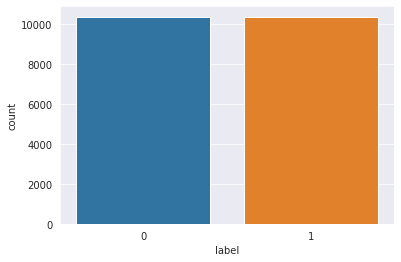

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(x=messages['label'])

### Wordcloud

We have created word cloud to analyse the most frequent words in our data. The word clouds are generated after removing the stopwords from data.

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud. A **word cloud** is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.<sup/>[[Word Cloud]](https://boostlabs.com/blog/what-are-word-clouds-value-simple-visualizations/)

**Stop words** are commonly used words in a language. For example *a, an, the, what, how*, etc in english language.

**Word cloud for non fake news i.e. Class 0**

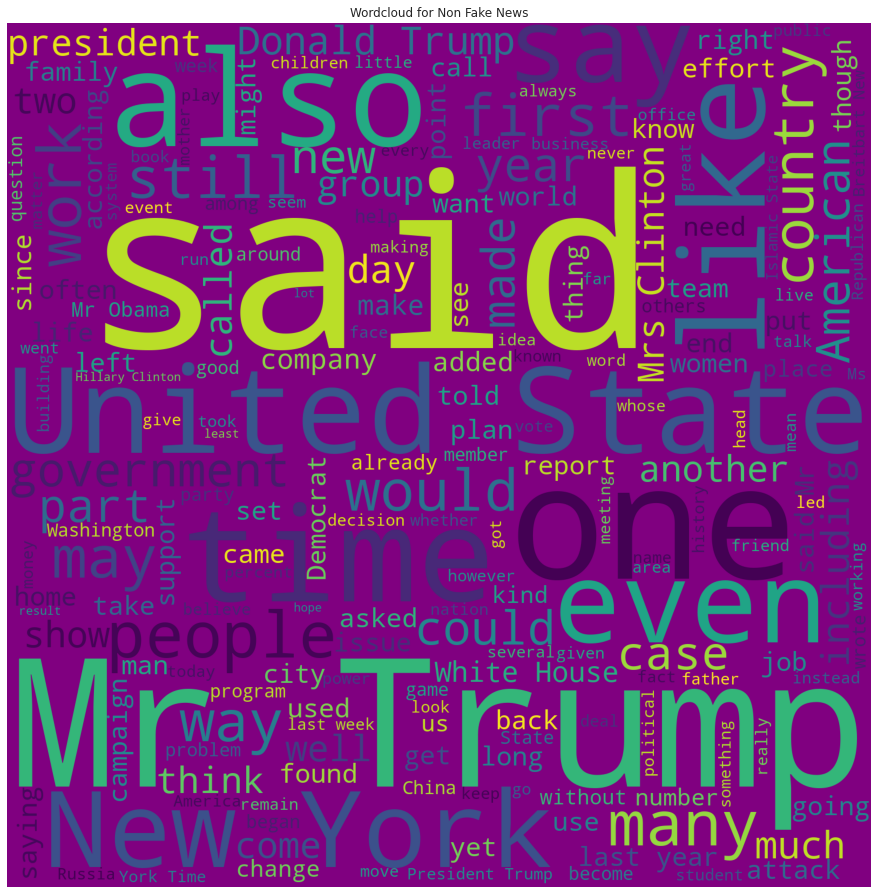

In [ ]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

wc = WordCloud(width = 1600, height = 1600,                 # Height and Width of the wordcloud plot in pixels  
                background_color ='purple',                 # Background colour of wordcloud plot
                stopwords = stopwords.words('english'),     # Stopwords are not included in wordcloud
                min_font_size = 10)                         # The font size of least frequent word 

wordcloud = wc.generate(' '.join(messages[messages['label'] == 0].text))   # The generate() function takes all the text as input, so all the class 0 texts are concatenated with <space>

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12), facecolor = None)          # Size of the image is 12x12
plt.imshow(wordcloud)                                     # Plot the wordcloud
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Wordcloud for Non Fake News')
plt.show()

**Word cloud for fake news i.e. Class 1**

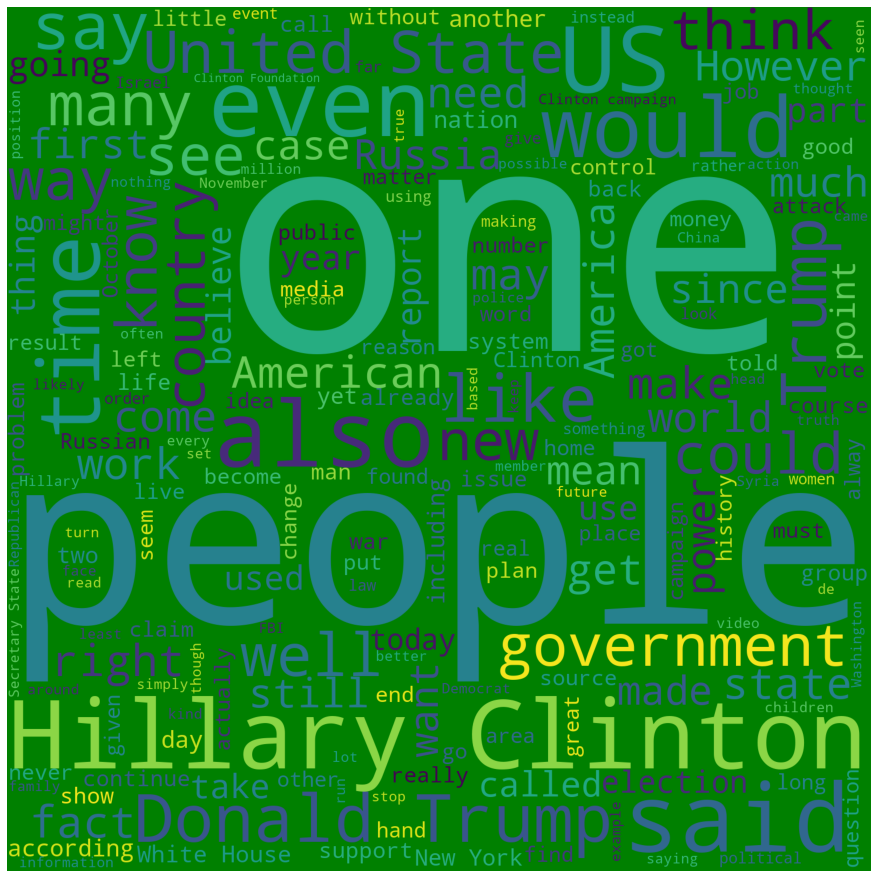

In [ ]:
wc = WordCloud(width = 1600, height = 1600,                 # Height and Width of the wordcloud plot in pixels 
                background_color ='green',                  # Background colour of wordcloud plot
                stopwords = stopwords.words('english'),     # Stopwords are not included in wordcloud
                min_font_size = 10)                         # The font size of least frequent word 

wordcloud = wc.generate(" ".join(messages[messages['label'] == 1].text))  # The generate() function takes all the text as input, so all the class 0 texts are concatenated with <space>

plt.figure(figsize = (12, 12), facecolor = None)            # Size of the image is 12x12
plt.imshow(wordcloud)                                       # Plot the wordcloud
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## Preprocessing Data (Stemming and Lemmatization)

Necessary Natural Language Processing tools are imported.<br/><br/>
*word_tokenize* will be used for tokenizing the text, pos_tag will be used for part of speech tagging, stopwords will be used for removing stopwords, wordnet for part of speech tagging, WordNetLemmatizer for lemmatization of words, SnowBallStemmer for stemming of words. 

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from collections import defaultdict

Reference: [Cell of Code Reference 2](https://www.kaggle.com/rushmorganounza/fake-news-detection-using-svm?scriptVersionId=75145703&cellId=15)

In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [ ]:
from copy import deepcopy

message = deepcopy(messages)

All the texts are converted to lowercase and then those lowercase texts are tokenized using word_tokenize.

Reference: [Cell of Code Reference 2](https://www.kaggle.com/rushmorganounza/fake-news-detection-using-svm?scriptVersionId=75145703&cellId=15)

In [ ]:
messages['text'] = [entry.lower() for entry in messages['text']]        # Convert to lowecase
messages['text'] = [word_tokenize(entry) for entry in messages['text']] # Tokenize the texts

In [ ]:
msg = deepcopy(messages)

The stopwords and non-alphabetical tokens are removed and the remaining tokens are stemmed using SnowballStemmer.

**Stemming** refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. For example, stemming of *analysis* to *analysi* by *Porter Stemmer*.<sup>[Stemming](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)



References: 
1. [Cell of Code Reference 3](https://www.kaggle.com/karan842/fake-news-countervectorizer-tfidfvectorizer/notebook?scriptVersionId=75783337&cellId=25)
2. [Cell of Code Reference 2](https://www.kaggle.com/rushmorganounza/fake-news-detection-using-svm?scriptVersionId=75145703&cellId=15)

In [ ]:
ps = SnowballStemmer('english')
for idx,title in zip(messages.index, messages['text']):                   # For each news article
    if idx%1000 == 0: print(f"Processed {idx} texts")                      # Just for checking progress
    review = [ps.stem(word) for word in title if (word not in stopwords.words('english') and word.isalpha())]     # stopwords and non-alphabetical tokens are removed and remaining are stemmed
    messages['text'][idx] = ' '.join(review)                              # Replace the tokenized text with processed text

Processed 0 texts
Processed 1000 texts
Processed 2000 texts
Processed 3000 texts
Processed 4000 texts
Processed 5000 texts
Processed 6000 texts
Processed 7000 texts
Processed 8000 texts
Processed 9000 texts
Processed 10000 texts
Processed 11000 texts
Processed 12000 texts
Processed 13000 texts
Processed 14000 texts
Processed 15000 texts
Processed 16000 texts
Processed 17000 texts
Processed 18000 texts
Processed 19000 texts
Processed 20000 texts


We are saving preprocessed data because data preprocessing is too time consuming.

In [ ]:
#messages.to_csv('preprocessed_data_train_stemmed.csv',index=False)

The stopwords and non-alphabetical tokens are removed and the remaining tokens are temmatized using WordNetLemmatizer. Part of speech tagging is used for more accurate lemmatization.

**Lemmatization** refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the *lemma*.<sup>[Lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)

**Difference between Stemming and Lemmatization**
If confronted with the token *saw*, stemming might return just *s*, whereas lemmatization would attempt to return either *see* or *saw* depending on whether the use of the token was as a verb or a noun. The two may also differ in that stemming most commonly collapses derivationally related words, whereas lemmatization commonly only collapses the different inflectional forms of a lemma.<sup>[Differences](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)



Reference: [Cell of Code Refernece 2](https://www.kaggle.com/rushmorganounza/fake-news-detection-using-svm?scriptVersionId=75145703&cellId=15)

In [ ]:
messages = msg # Use the other copy to create lemmatized dataset

In [ ]:
wnl = WordNetLemmatizer()
for idx,title in zip(messages.index, messages['text']):         # For each news article
    if idx%1000 == 0:  print(f"Processed {idx} texts")           # Just for checking progress
    review = [wnl.lemmatize(word,tag_map[tag[0]]) for word,tag in pos_tag(title) if (word not in stopwords.words('english') and word.isalpha())] # stopwords and non-alphabetical tokens are removed and remaining are lemmatized
    messages['text'][idx] = ' '.join(review)                    # Replace the tokenized text with processed text

Processed 0 texts
Processed 1000 texts
Processed 2000 texts
Processed 3000 texts
Processed 4000 texts
Processed 5000 texts
Processed 6000 texts
Processed 7000 texts
Processed 8000 texts
Processed 9000 texts
Processed 10000 texts
Processed 11000 texts
Processed 12000 texts
Processed 13000 texts


We are saving preprocessed data because data preprocessing is too time consuming.

In [ ]:
#messages.to_csv('preprocessed_data_train_lemmatized.csv',index=False)

## Text Vectorization and Classification (Stemmed Data)

The machine learning algorithms work on numerical values. So, the text (even after lemmatization/stemming) has to be converted to numerical form, that is, vectors.  

Reference: [Code Reference 1](https://medium.com/analytics-vidhya/fake-news-detection-using-nlp-techniques-c2dc4be05f99)

**The data preprocessing part is too time consuming, so we have already uploaded the preprocessed data on drive from where it can ve downloaded using gdown** 

In [ ]:
! gdown --id 1-9KTx3bDtBeP1l1MBA3shs3uJsUUtlrN

Downloading...
From: https://drive.google.com/uc?id=1-9KTx3bDtBeP1l1MBA3shs3uJsUUtlrN
To: /content/preprocessed_data_train_stemmed.csv
100% 55.3M/55.3M [00:00<00:00, 133MB/s]


**Stemmed Data**<br/>
The stemmed (preprocessed) dataset is read into the memory.Some news areticles are just empty string so we got some NULL values in preprocessed dataset. So those NULL values are removed and the dataframe is visualized.

In [ ]:
messages = pd.read_csv('preprocessed_data_train_stemmed.csv')
messages = messages.dropna()
messages

,text,label
0,hous dem aid even see comey letter jason chaff...,1
1,ever get feel life circl roundabout rather hea...,0
2,truth might get fire octob tension intellig an...,1
3,video civilian kill singl us airstrik identifi...,1
4,print iranian woman sentenc six year prison ir...,1
...,...,...
20756,rapper unload black celebr met donald trump el...,0
20757,green bay packer lost washington redskin week ...,0
20758,maci today grew union sever great name america...,0
20759,nato russia hold parallel exercis balkan press...,1


Split the dataset into training and test data. We are using 75% of our dataset for training and 25% of dataset as test data. We are using stratified sampling so that the ratio of data points in each class in training data and test data is same as original ratio.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(messages['text'],              # X Part of data
                                                 messages['label'],             # Class Labels
                                                 test_size=0.25,                # 25% of data is used as test data
                                                 random_state = 546,
                                                 stratify = messages['label'])  # Stratified sampling

We are using two vectorization techniques *Count Vectorization* and *TF-IDF Vectorization*.

### Count Vectorization

In **count vectorization** unique words are extracted from all the available documents i.e. a vocabulary is created. Each document is represented by a vector of size which is same as the size of vocabulary where each dimension correspond to a word/token in vocabulary, and the value at that index is equal to the number of occurences of that word/token in that document.

For example let us consider the following documents:<br/>
*Doc1: hello friend*<br/>
*Doc2: my friend is a good person, his friend is my friend*<br/>
*Doc3: day is good*<br/>

So, the vocabulary we have is: {*hello:1, my:2, friend:3, is:4, a:5,good:6, person:7, his:8, day:9*}

And the vector representations are:<br/>
$$Doc1 = (1,0,1,0,0,0,0,0,0)$$
$$Doc2 = (0,2,3,2,1,1,1,1,0)$$
$$Doc3 = (0,0,0,1,0,1,0,0,1)$$



CountVectorizer is imported, an instance is created, then fitted on training data and then Training data and Test data is transformed.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv_train = CountVectorizer()              # Instance
cv_train.fit(X_train)                     # Fit on training data
X_train_cv = cv_train.transform(X_train)  # Transform training data
X_test_cv = cv_train.transform(X_test)    # Transform test data

#### Multinomial Naive Bayes

Multinomial Naive Bayes classifer is used here. It is first trained and then trained classifier is used for making predictions on test data. The accuracy_score, precision_score and recall_score is used for model evaluation. We have also plotted confusion matrix.

Accuracy: 0.8765957446808511
Precision: 0.9502093997208003
Recall: 0.7936261173727167


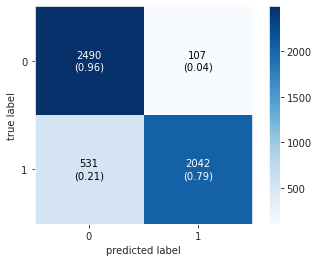

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from mlxtend.plotting import plot_confusion_matrix

nb = MultinomialNB()
nb.fit(X_train_cv,y_train)          # Train the classifier
y_pred = nb.predict(X_test_cv)      # Make prediction

# Model Evaluation
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

# Confusion Matrix
plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Support Vector Machine

Linear SVM classifer is used here. It is first trained and then trained classifier is used for making predictions on test data. The accuracy_score, precision_score and recall_score is used for model evaluation. We have also plotted confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.9187620889748549
Precision: 0.9104079298513152
Recall: 0.9280994947532064


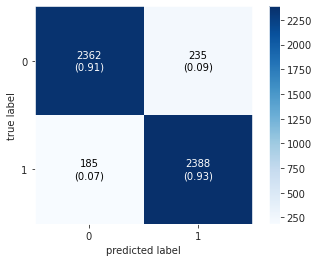

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_cv,y_train)       # Train the Classifier
y_pred = svm.predict(X_test_cv)   # Make predictions

# Evaluate the model
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

# Confusion Matrix
plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Passive Agressive Classifier

Passive Agressive classifer is used here. It is first trained and then trained classifier is used for making predictions on test data. The accuracy_score, precision_score and recall_score is used for model evaluation. We have also plotted confusion matrix.

Accuracy: 0.9172147001934235
Precision: 0.9126587148903424
Recall: 0.9218810726778081


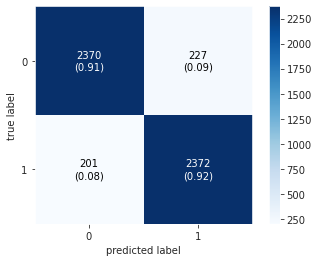

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(X_train_cv,y_train)         # Train the Classifier
y_pred = pac.predict(X_test_cv)     # Make predictions

# Evaluate the Model
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

# Confusion Matrix
plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### TF-IDF Vectorization

In TF-IDF Tf stands for term frequency, the number of times the word appears in each document.Idf stands for inverse document frequency, an inverse count of the number of documents a word appears in. Idf measures how significant a word is in the whole corpus.<sup/>[TF-IDF](https://openclassrooms.com/en/courses/6532301-introduction-to-natural-language-processing/7067116-apply-the-tf-idf-vectorization-approach#/id/r-7067131)

Mathematically,
\begin{equation}
    tf(t,d)=\frac{f_{t,d}}{\sum_{t' \epsilon D} f_{t',d}} 
    = \frac{{Number\;of\;times\;term\;t\;appears\;in\;document\;d}}
    {{Number\;of\;terms\;in\;document\;d}}
\end{equation}
and,
\begin{equation}
    idf(t,D)=log(\frac{N}{| \{ d \in D:t \in D \} |})
    =log(\frac{{Total\;Number\;of\;Documents}}{{Number\;of\;documents\;which\;contains\;term\;t}})
\end{equation}

Then TF-IDF is calculated as follows,
\begin{equation}
    tfidf(t,d,D)=tf(t,d)\cdot idf(t,D)
\end{equation}



*TfidfTransformer* is imported, an instance is created, then fitted on training data (output from Count Vectorizer) and then Training data and Test data is transformed. We can do TF-IDF Vectorization using *TfidfVectorizer* also directly from the training data (text) which internally first creates CountVector and then creates TF-IDF vectors. Since we already had Count Vectors, we used *TfidfTransformer*. 

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_train = TfidfTransformer()                    # Instance
tfidf_train.fit(X_train_cv)                         # Fit on the count vectorized training data
X_train_tfidf = tfidf_train.transform(X_train_cv)   # Transform the count vectorized training data
X_test_tfidf = tfidf_train.transform(X_test_cv)     # Transform the count vectorized test data 

#### Multinomial Naive Bayes

Multinomial Naive Bayes classifer is used here. It is first trained and then trained classifier is used for making predictions on test data. The accuracy_score, precision_score and recall_score is used for model evaluation. We have also plotted confusion matrix.

Accuracy: 0.8400386847195358
Precision: 0.9807268722466961
Recall: 0.6921881072677808


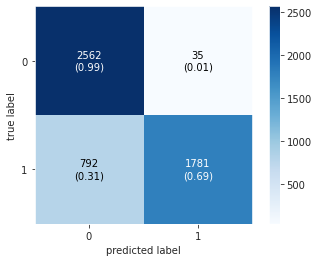

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)     # Train the classifier
y_pred = nb.predict(X_test_tfidf) # Make predictions

# Model Evaluation
print("Accuracy:",accuracy_score(y_test,y_pred))  
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

# Confusion Matrix
plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Support Vector Machine

Linear SVM classifer is used here. It is first trained and then trained classifier is used for making predictions on test data. The accuracy_score, precision_score and recall_score is used for model evaluation. We have also plotted confusion matrix.

Accuracy: 0.9448742746615088
Precision: 0.9430673896204492
Recall: 0.946366109599689


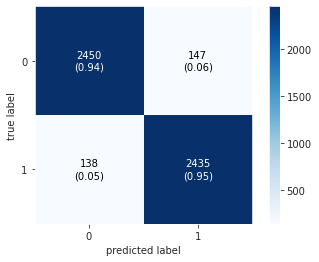

In [ ]:
svm = LinearSVC()
svm.fit(X_train_tfidf,y_train)      # Train the classifier
y_pred = svm.predict(X_test_tfidf)  # Make predictions

# Evaluate the model
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

# Confusion matrix
plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Passive Agressive Classifier

Passive Agressive classifer is used here. It is first trained and then trained classifier is used for making predictions on test data. The accuracy_score, precision_score and recall_score is used for model evaluation. We have also plotted confusion matrix.

Accuracy: 0.9417794970986461
Precision: 0.936587240584166
Recall: 0.9471434123591139


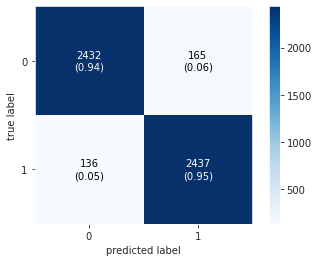

In [ ]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train_tfidf,y_train)      # Train the classifier
y_pred = pac.predict(X_test_tfidf)  # Make predictions

# Evaluate the model
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

# Confusion Matrix
plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Text Vectorization and Classification (Lemmatized Data)

Reference: [Code Reference 1](https://medium.com/analytics-vidhya/fake-news-detection-using-nlp-techniques-c2dc4be05f99)

**The data preprocessing part is too time consuming, so we have already uploaded the preprocessed data on drive from where it can be downloaded using gdown** 

In [ ]:
! gdown --id 1-GRb--j0zfXNIwmQMWu-tu-csxhTSvzs

Downloading...
From: https://drive.google.com/uc?id=1-GRb--j0zfXNIwmQMWu-tu-csxhTSvzs
To: /content/preprocessed_data_train_lemmatized.csv
100% 60.3M/60.3M [00:00<00:00, 116MB/s] 


**Lemmatized Data**<br/>
The lemmatized (preprocessed) dataset is read into the memory. Some news areticles are just empty string so we got some NULL values in preprocessed dataset. So those NULL values are removed and the dataframe is visualized.

In [ ]:
messages = pd.read_csv('preprocessed_data_train_lemmatized.csv')
messages = messages.dropna()
messages

,text,label
0,house dem aide even see comey letter jason cha...,1
1,ever get feeling life circle roundabout rather...,0
2,truth might get fire october tension intellige...,1
3,video civilian kill single u airstrike identif...,1
4,print iranian woman sentence six year prison i...,1
...,...,...
20756,rapper unload black celebrity meet donald trum...,0
20757,green bay packer lose washington redskins week...,0
20758,macy today grow union several great name ameri...,0
20759,nato russia hold parallel exercise balkan pres...,1


Split the dataset into training and test data. We are using 75% of our dataset for training and 25% of dataset as test data. We are using stratified sampling so that the ratio of data points in each class in training data and test data is same as original ratio.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(messages['text'],messages['label'],
                                                             test_size=0.25, 
                                                             random_state = 546,
                                                             stratify = messages['label'])

We are using two vectorization techniques *Count Vectorization* and *TF-IDF Vectorization*.

### Count Vectorization

In **count vectorization** unique words are extracted from all the available documents i.e. a vocabulary is created. Each document is represented by a vector of size which is same as the size of vocabulary where each dimension correspond to a word/token in vocabulary, and the value at that index is equal to the number of occurences of that word/token in that document.

For example let us consider the following documents:<br/>
*Doc1: hello friend*<br/>
*Doc2: my friend is a good person, his friend is my friend*<br/>
*Doc3: day is good*<br/>

So, the vocabulary we have is: {*hello:1, my:2, friend:3, is:4, a:5,good:6, person:7, his:8, day:9*}

And the vector representations are:<br/>
$$Doc1 = (1,0,1,0,0,0,0,0,0)$$
$$Doc2 = (0,2,3,2,1,1,1,1,0)$$
$$Doc3 = (0,0,0,1,0,1,0,0,1)$$



CountVectorizer is imported, an instance is created, then fitted on training data and then Training data and Test data is transformed.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv_train = CountVectorizer()
cv_train.fit(X_train)
X_train_cv = cv_train.transform(X_train)
X_test_cv = cv_train.transform(X_test)

#### Multinomial Naive Bayes

Multinomial Naive Bayes classifer is used here. It is first trained and then trained classifier is used for making predictions on test data. The accuracy_score, precision_score and recall_score is used for model evaluation. We have also plotted confusion matrix.

Accuracy: 0.8731141199226305
Precision: 0.9468531468531468
Recall: 0.7893509521958803


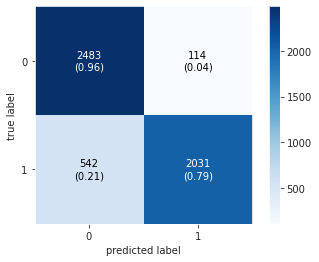

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from mlxtend.plotting import plot_confusion_matrix

nb = MultinomialNB()
nb.fit(X_train_cv,y_train)
y_pred = nb.predict(X_test_cv)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Support Vector Machine

Linear SVM classifer is used here. It is first trained and then trained classifier is used for making predictions on test data. The accuracy_score, precision_score and recall_score is used for model evaluation. We have also plotted confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.9214700193423597
Precision: 0.9105721864342554
Recall: 0.9339292654488923


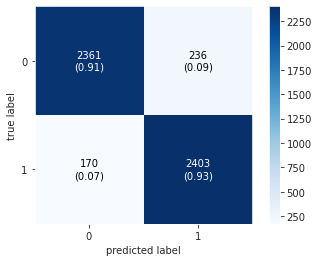

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_cv,y_train)
y_pred = svm.predict(X_test_cv)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Passive Agressive Classifier

Passive Agressive classifer is used here. It is first trained and then trained classifier is used for making predictions on test data. The accuracy_score, precision_score and recall_score is used for model evaluation. We have also plotted confusion matrix.

Accuracy: 0.9239845261121857
Precision: 0.9166666666666666
Recall: 0.9319860085503303


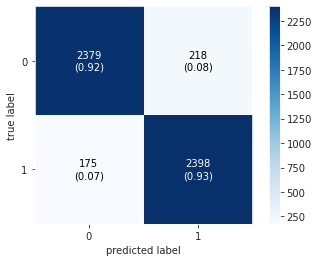

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(X_train_cv,y_train)
y_pred = pac.predict(X_test_cv)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### TF-IDF Vectorization

In TF-IDF Tf stands for term frequency, the number of times the word appears in each document.Idf stands for inverse document frequency, an inverse count of the number of documents a word appears in. Idf measures how significant a word is in the whole corpus.<sup/>[TF-IDF](https://openclassrooms.com/en/courses/6532301-introduction-to-natural-language-processing/7067116-apply-the-tf-idf-vectorization-approach#/id/r-7067131)

Mathematically,
\begin{equation}
    tf(t,d)=\frac{f_{t,d}}{\sum_{t' \epsilon D} f_{t',d}} 
    = \frac{{Number\;of\;times\;term\;t\;appears\;in\;document\;d}}
    {{Number\;of\;terms\;in\;document\;d}}
\end{equation}
and,
\begin{equation}
    idf(t,D)=log(\frac{N}{| \{ d \in D:t \in D \} |})
    =log(\frac{{Total\;Number\;of\;Documents}}{{Number\;of\;documents\;which\;contains\;term\;t}})
\end{equation}

Then TF-IDF is calculated as follows,
\begin{equation}
    tfidf(t,d,D)=tf(t,d)\cdot idf(t,D)
\end{equation}



*TfidfTransformer* is imported, an instance is created, then fitted on training data (output from Count Vectorizer) and then Training data and Test data is transformed. We can do TF-IDF Vectorization using *TfidfVectorizer* also directly from the training data (text) which internally first creates CountVector and then creates TF-IDF vectors. Since we already had Count Vectors, we used *TfidfTransformer*. 

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_train = TfidfTransformer()
tfidf_train.fit(X_train_cv)
X_train_tfidf = tfidf_train.transform(X_train_cv)
X_test_tfidf = tfidf_train.transform(X_test_cv)

#### Multinomial Naive Bayes

Multinomial Naive Bayes classifer is used here. It is first trained and then trained classifier is used for making predictions on test data. The accuracy_score, precision_score and recall_score is used for model evaluation. We have also plotted confusion matrix.

Accuracy: 0.8367504835589942
Precision: 0.980544747081712
Recall: 0.68558103381267


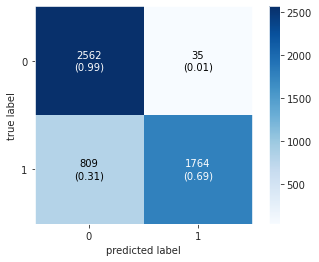

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)
y_pred = nb.predict(X_test_tfidf)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Support Vector Machine

Linear SVM classifer is used here. It is first trained and then trained classifier is used for making predictions on test data. The accuracy_score, precision_score and recall_score is used for model evaluation. We have also plotted confusion matrix.

Accuracy: 0.9446808510638298
Precision: 0.9440776699029126
Recall: 0.9448115040808395


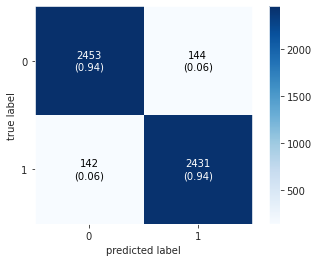

In [ ]:
svm = LinearSVC()
svm.fit(X_train_tfidf,y_train)
y_pred = svm.predict(X_test_tfidf)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### Passive Agressive Classifier

Passive Agressive classifer is used here. It is first trained and then trained classifier is used for making predictions on test data. The accuracy_score, precision_score and recall_score is used for model evaluation. We have also plotted confusion matrix.

Accuracy: 0.9427466150870406
Precision: 0.9397450753186558
Recall: 0.9455888068402643


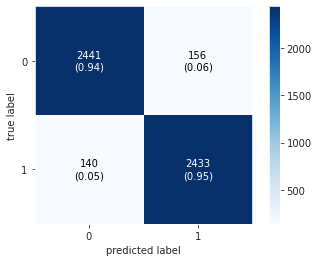

In [ ]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train_tfidf,y_train)
y_pred = pac.predict(X_test_tfidf)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Fake news detection using Embedding layer and Neural Network (New Method)

## Reading the preprocessed dataset

Downloading the already preprocessed (first converted to lowercase then non-alphabets removed and then lemmatized after removing the stopwords) dataset.

In [ ]:
! gdown --id 1-GRb--j0zfXNIwmQMWu-tu-csxhTSvzs

Downloading...
From: https://drive.google.com/uc?id=1-GRb--j0zfXNIwmQMWu-tu-csxhTSvzs
To: /content/preprocessed_data_train_lemmatized.csv
100% 60.3M/60.3M [00:00<00:00, 161MB/s]


Read the preprocessed dataset into a pandas dataframe, clean the dataset and show the dataframe.

In [ ]:
import pandas as pd

messages = pd.read_csv('preprocessed_data_train_lemmatized.csv')
messages = messages.dropna()
messages

,text,label
0,house dem aide even see comey letter jason cha...,1
1,ever get feeling life circle roundabout rather...,0
2,truth might get fire october tension intellige...,1
3,video civilian kill single u airstrike identif...,1
4,print iranian woman sentence six year prison i...,1
...,...,...
20756,rapper unload black celebrity meet donald trum...,0
20757,green bay packer lose washington redskins week...,0
20758,macy today grow union several great name ameri...,0
20759,nato russia hold parallel exercise balkan pres...,1


## Splitting the dataset

Split the dataset into training and testing datasets. We are using 75% of dataset for training and 25% for testing. We are using stratify so that samples of both classes are proportional in train and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(messages['text'],messages['label'],
                                                             test_size=0.25, 
                                                             random_state = 546,
                                                             stratify = messages['label'])

## Encoding the training texts

The document is to be encoded as a sequence of integers. The Keras Embedding layer requires integer inputs where each integer maps to a single token that has a specific real-valued vector representation within the embedding. These vectors are random at the beginning of training, but during training become meaningful to the network.

First, we constructed an instance of the class then trained it on all the articles (text) in the training dataset. It develops a vocabulary of all tokens in the training dataset and develops a consistent mapping from words in the vocabulary to unique integers.

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.values)

We have used the mapping of words to encode the reviews in the training dataset. We are doing it by texts_to_sequences() function. It has to be ensured that all documents have the same length. So, we are padding all the texts to the length of the longest review in the training dataset. Firsty, we found the longest text using the max() function on the training dataset. We have then used Keras pad_sequences() for padding the sequences to the maximum length by adding 0 values towards the end.

In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_length = max([len(word.split()) for word in X_train.values])

encoded = tokenizer.texts_to_sequences(X_train.values)
Xtrain = pad_sequences(encoded, maxlen=max_length, padding='post')

We need to specify the vocabulary size, the size of real-valued vector space and maximum length of input documents for Embedding layer. The vocabulary size is the total number of words in our vocabulary, plus one for unknown words. 

Tokenizer's word_index attribute stores the mapping of words to unique integers. So, the vocabulary size can be computed using its length.

In [ ]:
vocab_size = len(tokenizer.word_index)+1

## Defining the Neural Network

We have used a 100-dimensional vector space. The complete model definition is listed below including the Embedding layer. We use a Convolutional Neural Network (CNN) as they have proven to be successful at document classification problems. 

The neural network then has a convolutional layer with 32 filters having kernel size of 8 and having ReLU as activation function. This is followed by a 1D max-pooling layer that reduces the output of the convolutional layer by half. This is again followed by a convolutional layer with 64 filters having kernel size of 8 and having ReLU as activation function which is followed by a 1D max-pooling layer of size 2. And there's one more convolutional layer with 128 filters having kernel size of 8 and having ReLU as activation function. 

Next, the 2D output from the CNN part of the model is attened to one long 2D vector to represent the features extracted by the CNN. This is followed by the output dense layer of 2 neurons (Since we have two classes) having 'softmax' as activation function.

The model is compiled using categorical cross entropy loss function and the optimizer used is adam.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=8, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=8, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20352, 100)        13341800  
                                                                 
 conv1d (Conv1D)             (None, 20352, 32)         25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10176, 32)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10176, 64)         16448     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5088, 64)         0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 5088, 128)         6

The pictorial representation of the neural networks can be seen using plot_model function.

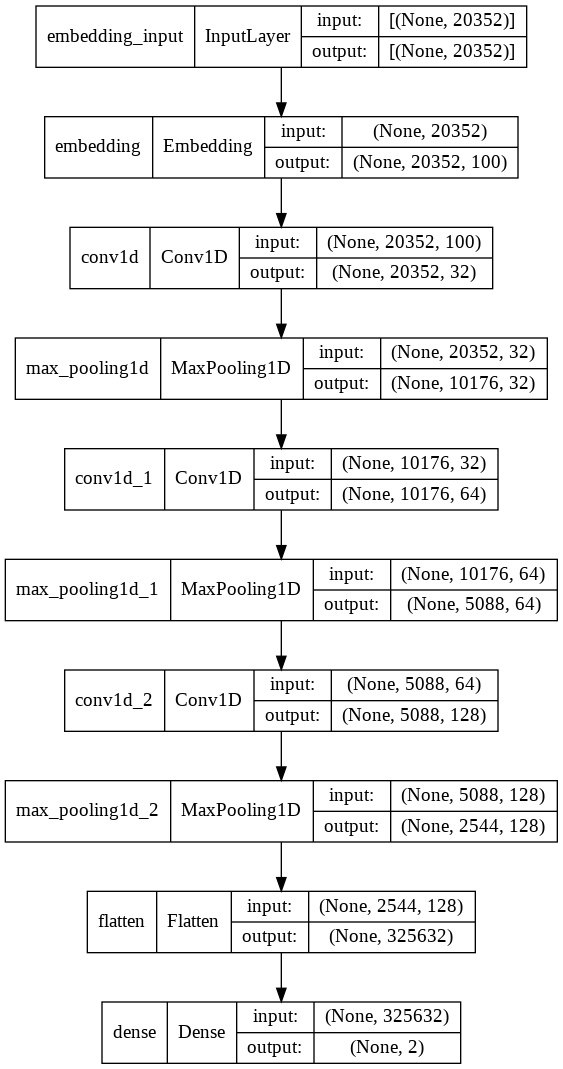

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)

## Training the Neural Network

The model is trained using the fit function.

In [ ]:
history = model.fit(Xtrain, y_train.values, epochs=10)

Epoch 1/10
485/485 [==============================] - 166s 336ms/step - loss: 0.2370 - accuracy: 0.8995
Epoch 2/10
485/485 [==============================] - 161s 333ms/step - loss: 0.0495 - accuracy: 0.9864
Epoch 3/10
485/485 [==============================] - 161s 332ms/step - loss: 0.0139 - accuracy: 0.9963
Epoch 4/10
485/485 [==============================] - 161s 331ms/step - loss: 0.0059 - accuracy: 0.9985
Epoch 5/10
485/485 [==============================] - 161s 331ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 6/10
485/485 [==============================] - 161s 331ms/step - loss: 0.0245 - accuracy: 0.9936
Epoch 7/10
485/485 [==============================] - 160s 329ms/step - loss: 0.0091 - accuracy: 0.9977
Epoch 8/10
485/485 [==============================] - 160s 330ms/step - loss: 0.0077 - accuracy: 0.9976
Epoch 9/10
485/485 [==============================] - 160s 330ms/step - loss: 0.0109 - accuracy: 0.9978
Epoch 10/10
485/485 [==============================] - 161s 332m

The plot of 'Epoch v/s Training Accuracy' is created using the matplotlib.pyplot plot function.

Text(0.5, 1.0, 'Training Accuracy')

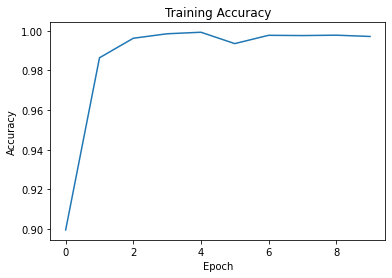

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

The plot of 'Epoch v/s Training Loss' is created using the matplotlib.pyplot plot function.

Text(0.5, 1.0, 'Training Loss')

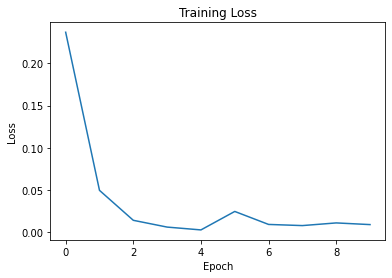

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

## Testing the Model

The testing dataset is encoded using the trained tokenizer and then padded to max_length (made suitable for input to the embedding layer of neural network).

In [ ]:
encoded = tokenizer.texts_to_sequences(X_test.values)
Xtest = pad_sequences(encoded, maxlen=max_length, padding='post')

The model is tested using different metrics provided by the sklearn library.

Accuracy of the model is 95.29980657640232 percent
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      2597
           1       0.98      0.93      0.95      2573

    accuracy                           0.95      5170
   macro avg       0.95      0.95      0.95      5170
weighted avg       0.95      0.95      0.95      5170



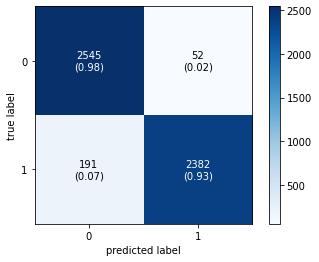

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from numpy import argmax

y_pred = argmax(model.predict(Xtest),axis=1)

print('Accuracy of the model is',accuracy_score(y_test.values,y_pred)*100,'percent')

plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

print('Classification Report:\n',classification_report(y_test.values,y_pred))

In [ ]:
loss,acc = model.evaluate(Xtest, y_test.values)
print('Accuracy of the model is',acc*100,'percent')

162/162 [==============================] - 14s 88ms/step - loss: 0.4713 - accuracy: 0.9530
Accuracy of the model is 95.29980421066284 percent
